### Importing needed packages

In [124]:
# %pip install scikit-learn
# %pip install matplotlib
# %pip install pandas
# %pip install numpy
# %matplotlib inline

In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the Data

##### `train_data.csv` [TRAIN DATASET LINK](https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722)
##### `test_data.csv` [TEST DATASET LINK](https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/edit#gid=2082460844)

Dataset columns are as follows:
- id - ID
- battery_power - Total energy a battery can store in one time measured in mAh
- blue - Has Bluetooth or not
- clock_speed - The speed at which the microprocessor executes instructions
- dual_sim - Has dual sim support or not
- fc - Front Camera megapixels
- four_g - Has 4G or not
- int_memory - Internal Memory in Gigabytes
- m_dep - Mobile Depth in cm
- mobile_wt - Weight of mobile phone
- n_cores - Number of cores of the processor
- pc - Primary Camera megapixels
- px_height - Pixel Resolution Height
- px_width - Pixel Resolution Width
- ram - Random Access Memory in Megabytes
- sc_h - Screen Height of mobile in cm
- sc_w - Screen Width of mobile in cm
- talk_time - longest time that a single battery charge will last when you are
- three_g - Has 3G or not
- touch_screen - Has touch screen or not
- wifi - Has wifi or not
- price_range - This is the target variable with the value of:
  - 0 (low cost)
  - 1 (medium cost)
  - 2 (high cost)
  - 3 (very high cost)

#### Load and prepare data


In [126]:
train_data = pd.read_csv("train_data.csv")
# test_data = pd.read_csv("test_data.csv")
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


## Data Preparation

### Check missing data & Cleaning

In [127]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100

# Display features with missing values and their percentages
missing_data = pd.DataFrame(
    {"Missing Values": missing_values, "Percentage": missing_percentage}
)
missing_data[missing_data["Missing Values"] > 0]

,Missing Values,Percentage
fc,5,0.25
four_g,5,0.25
int_memory,5,0.25
m_dep,5,0.25
mobile_wt,4,0.20
n_cores,4,0.20
pc,5,0.25
px_height,4,0.20
px_width,2,0.10
ram,2,0.10


In [128]:
def load_and_prepare_data(file_path):
    # Load the data
    # df = pd.read_csv(file_path)
    train_data = pd.read_csv(file_path)

    # # Identify numeric and non-numeric columns
    # numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
    # non_numeric_features = df.select_dtypes(exclude=["int64", "float64"]).columns

    # # Handle missing values for numeric features
    # if len(numeric_features) > 0:
    #     numeric_imputer = SimpleImputer(strategy="median")
    #     df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

    # # Handle missing values for non-numeric features
    # if len(non_numeric_features) > 0:
    #     non_numeric_imputer = SimpleImputer(strategy="most_frequent")
    #     df[non_numeric_features] = non_numeric_imputer.fit_transform(
    #         df[non_numeric_features]
    #     )

    # # Convert boolean-like columns to int
    # bool_like_columns = [
    #     "blue",
    #     "dual_sim",
    #     "four_g",
    #     "three_g",
    #     "touch_screen",
    #     "wifi",
    # ]
    # for col in bool_like_columns:
    #     if col in df.columns:
    #         df[col] = df[col].astype(int)
    # Impute missing numerical data with mean
    for column in train_data.select_dtypes(include=["float64", "int64"]).columns:
        if train_data[column].isnull().sum() > 0:
            train_data[column].fillna(train_data[column].mean(), inplace=True)

    # Impute missing categorical data with mode
    for column in train_data.select_dtypes(include=["object"]).columns:
        if train_data[column].isnull().sum() > 0:
            train_data[column].fillna(train_data[column].mode()[0], inplace=True)

    # return df
    return train_data


# Load and prepare data
train_data = load_and_prepare_data("train_data.csv")
# test_data = load_and_prepare_data("test_data.csv")

# Print info about the data
print("Train data shape:", train_data.shape)
print("\nTrain data info:")
train_data.info()

print("\nTrain data description:")
print(train_data.describe())

# Check for any remaining missing values
print("\nMissing values after preparation:")
print(train_data.isnull().sum())

Train data shape: (2000, 21)

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three

/tmp/ipykernel_253088/4253500366.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(train_data[column].mean(), inplace=True)


In [129]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_percentage = (missing_values / len(train_data)) * 100
missing_values

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Data description

In [130]:
print("\nTrain data description:")
print(train_data.describe())


Train data description:


       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.310276   
std       439.418206     0.5001     0.816004     0.500035     4.330340   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521303    32.048120     0.502256   140.266533     4.518036  ...   
std       0.499046    18.123767     0.288169    35.349256     2.286655  ...   
min       0.00000

### Check for any remaining missing values

In [131]:
print("\nMissing values after preparation:")
print(train_data.isnull().sum())



Missing values after preparation:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


## Exploratory data analysis


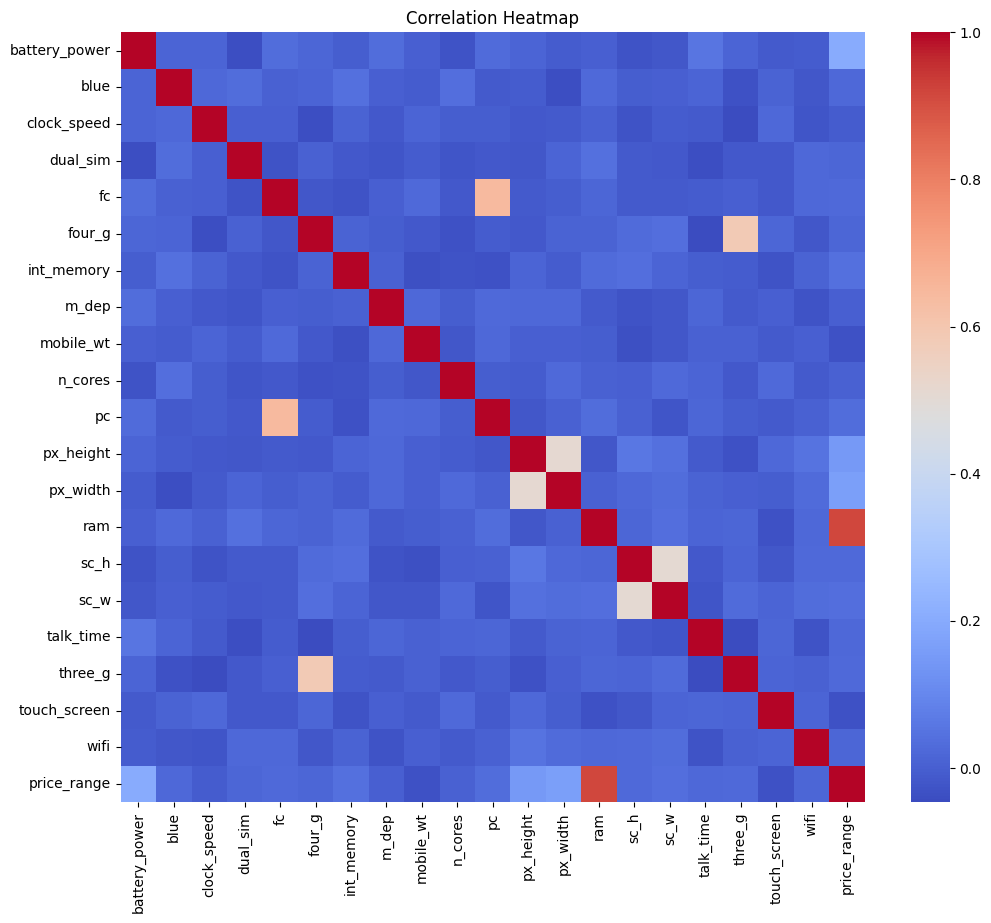

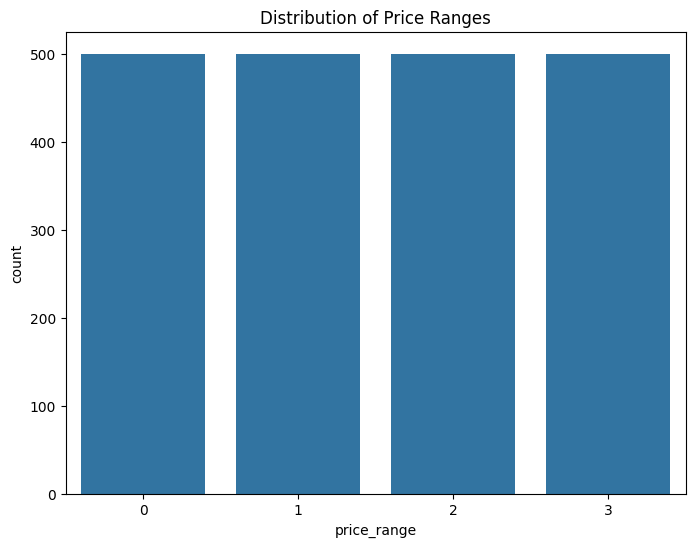

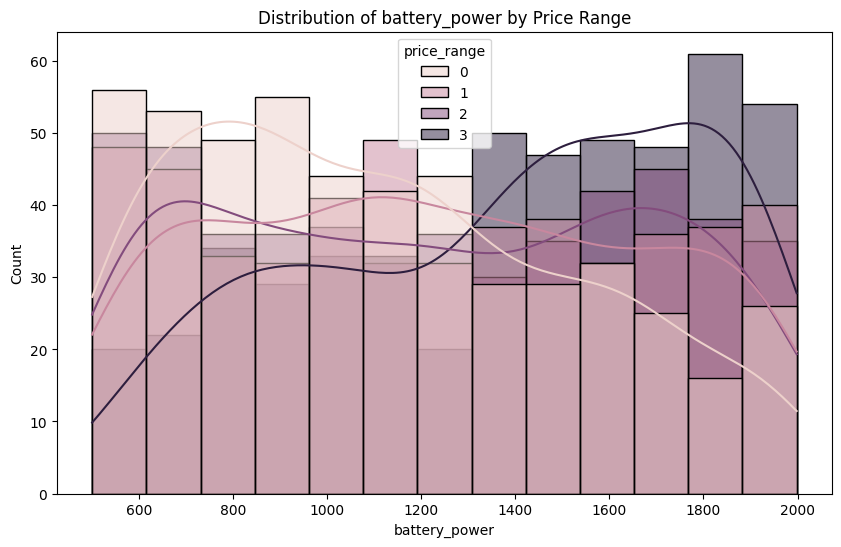

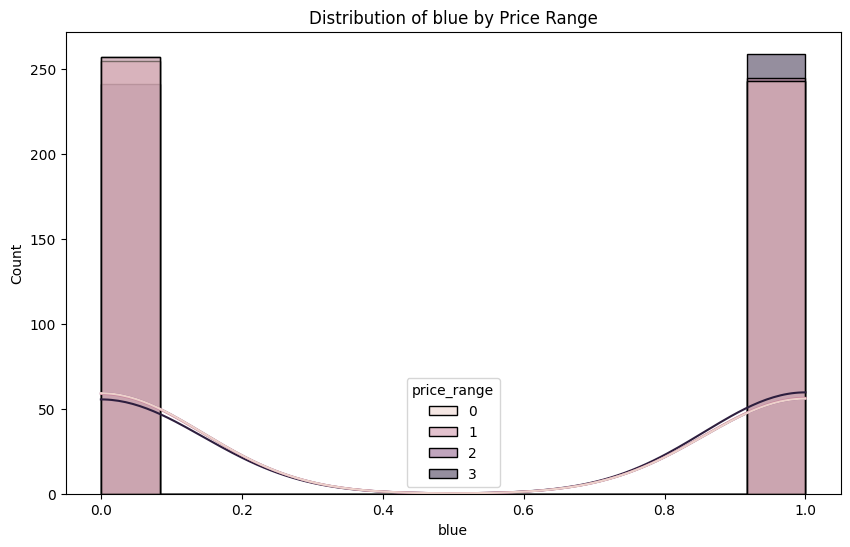

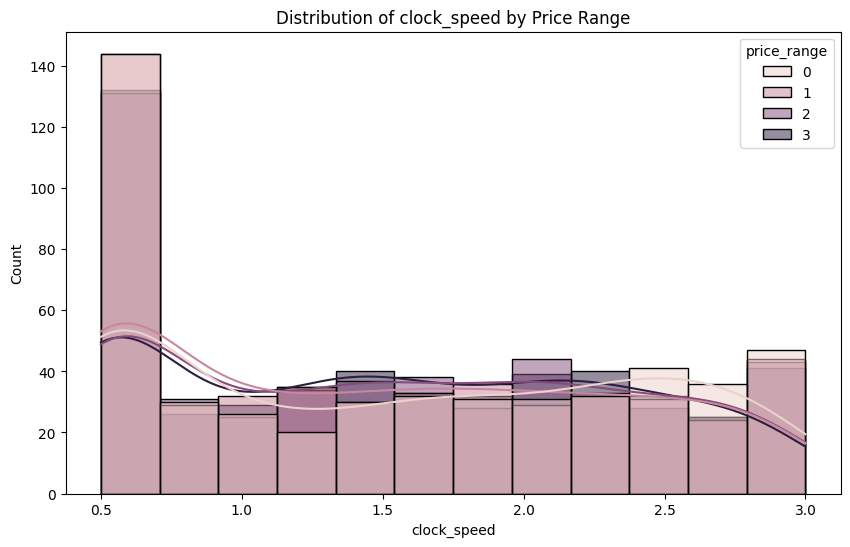

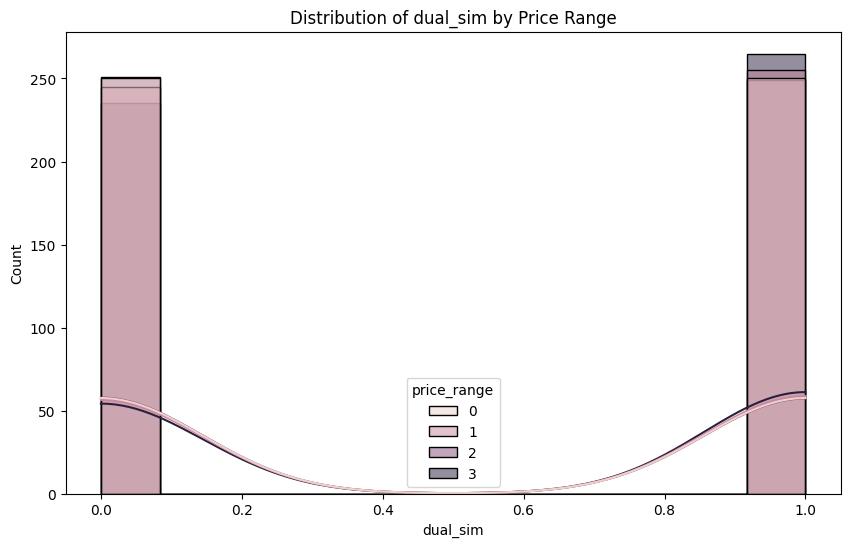

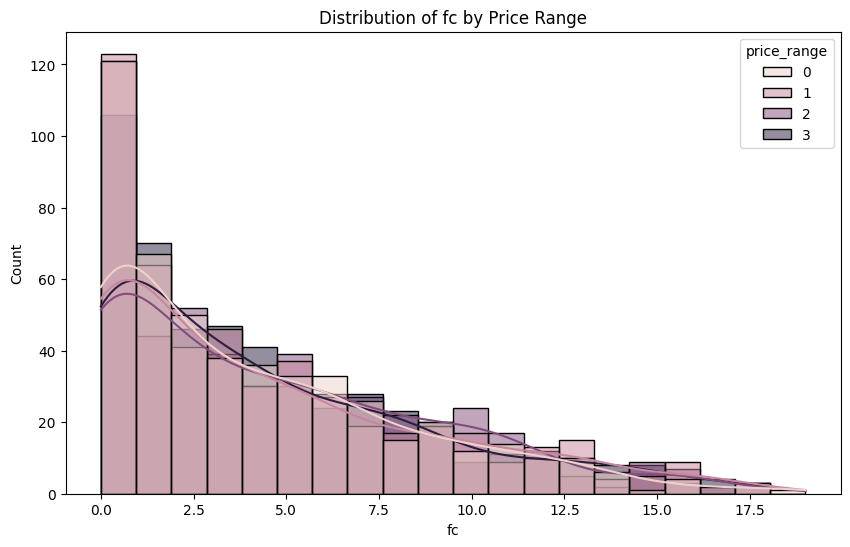

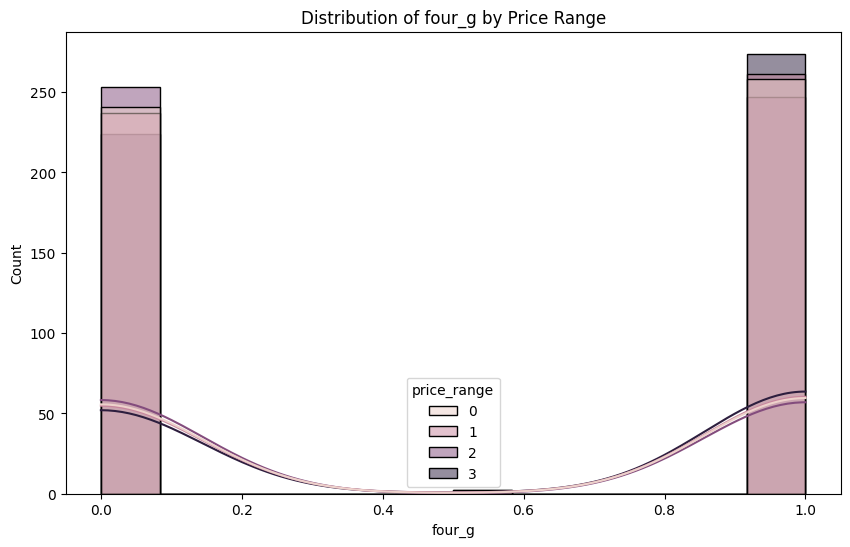

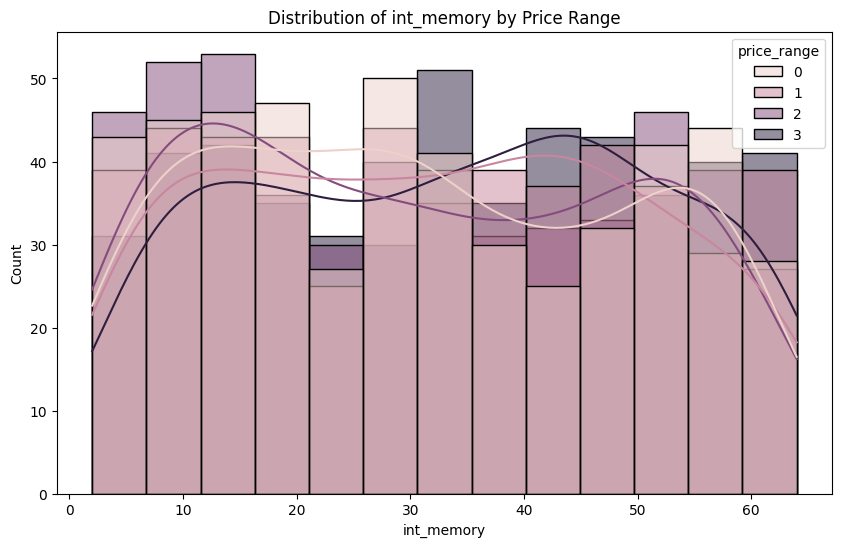

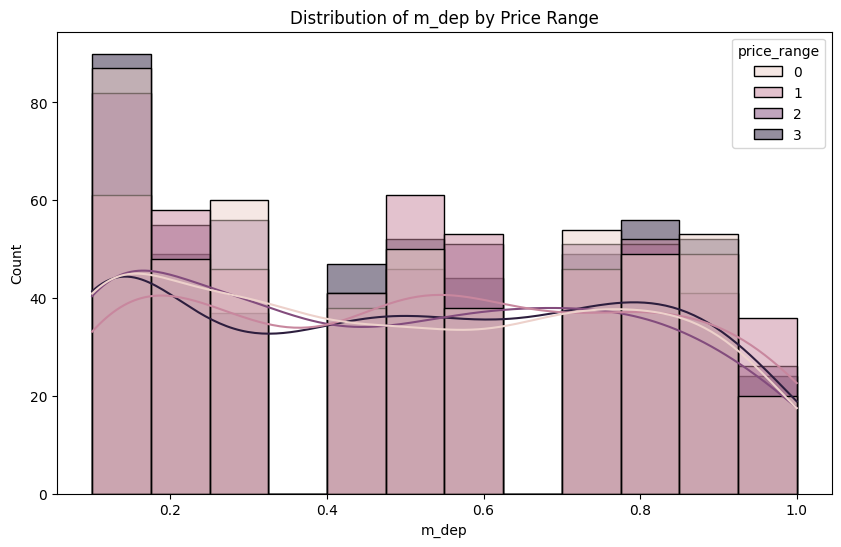

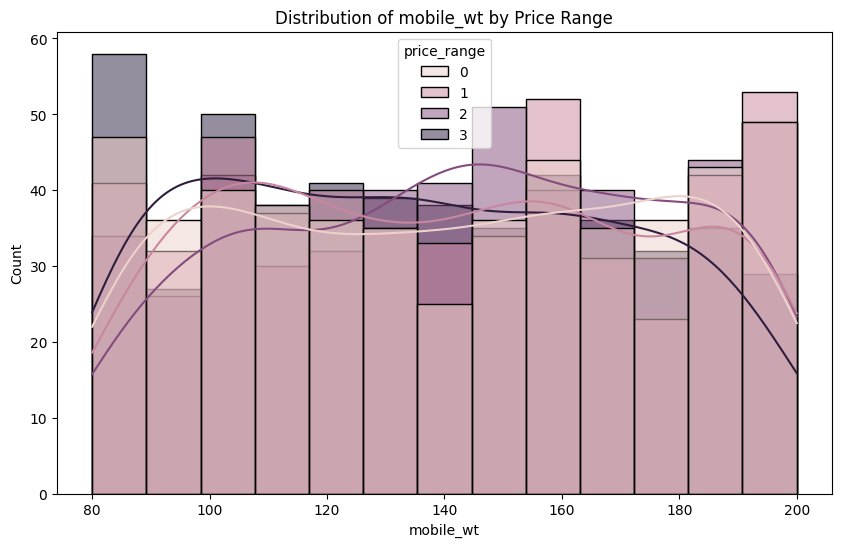

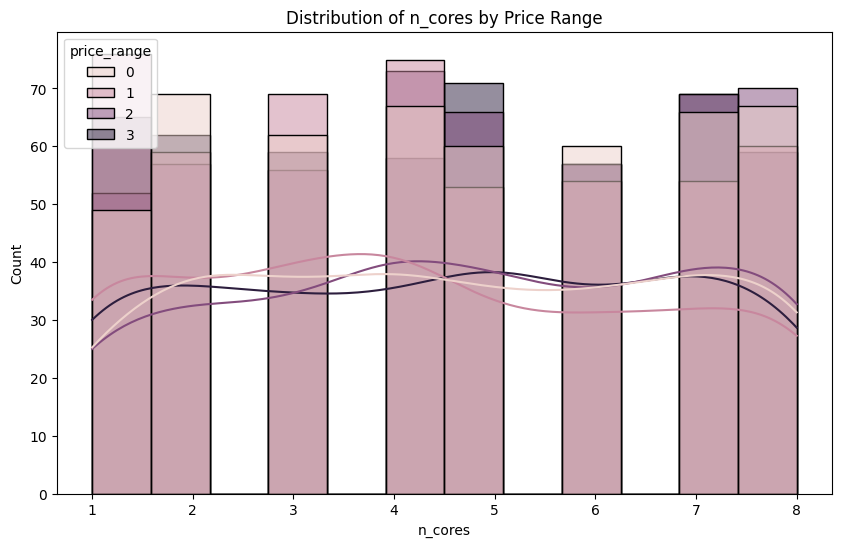

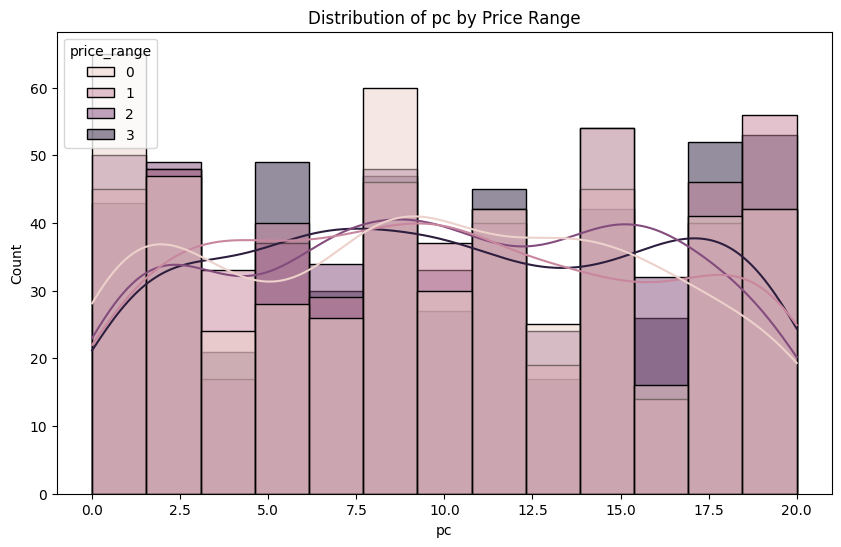

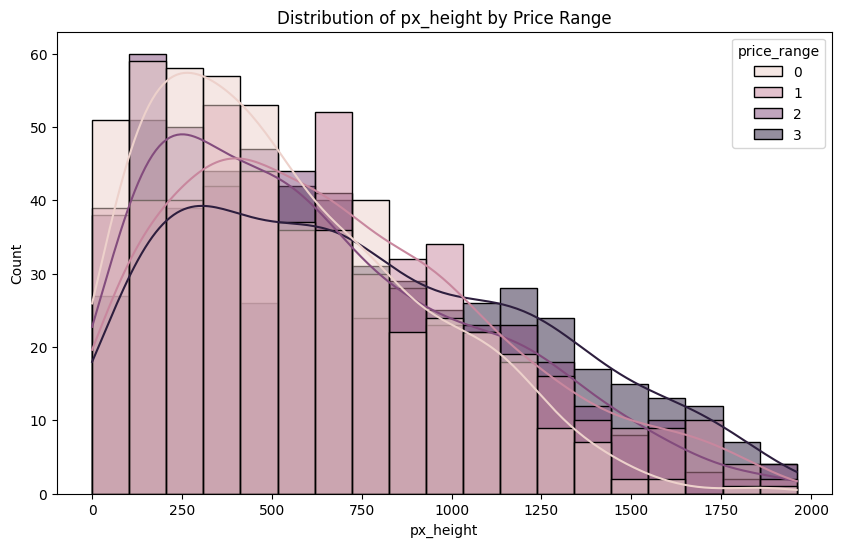

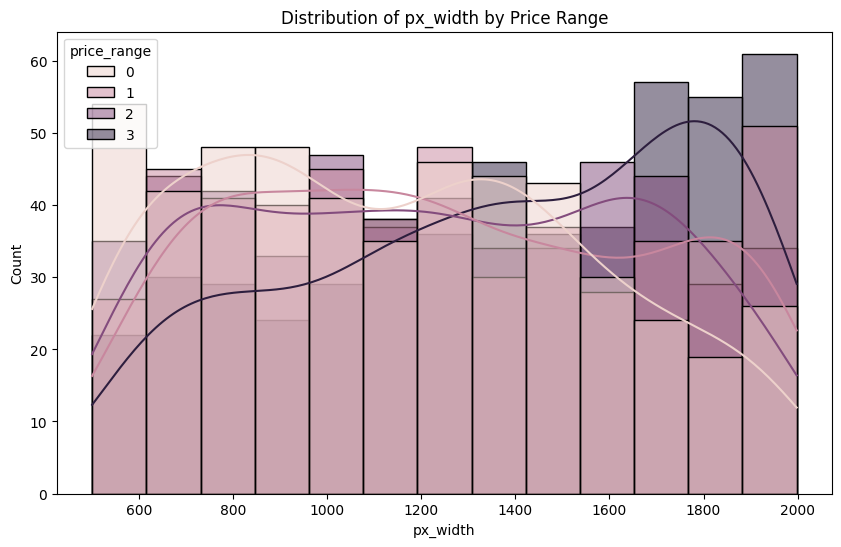

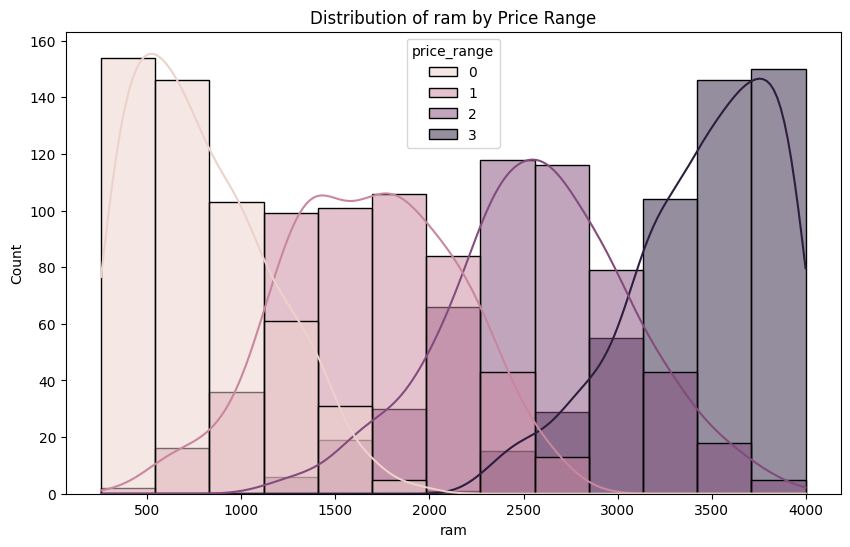

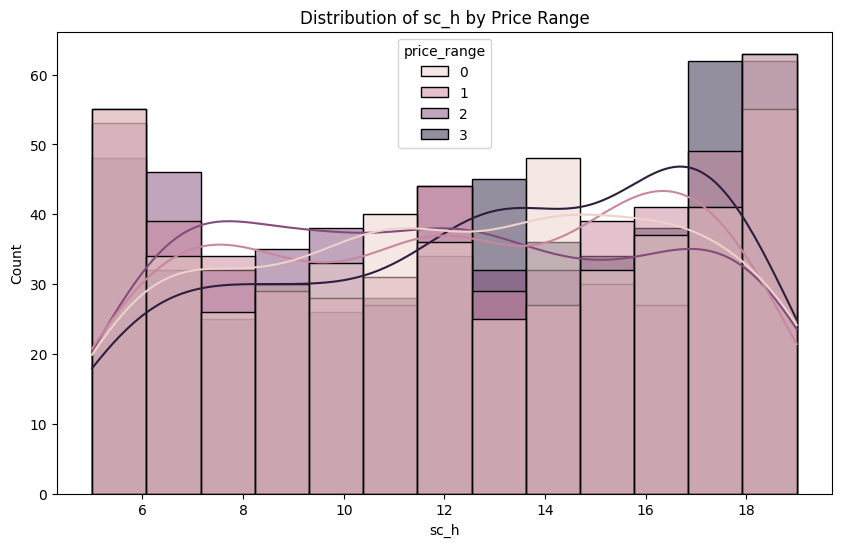

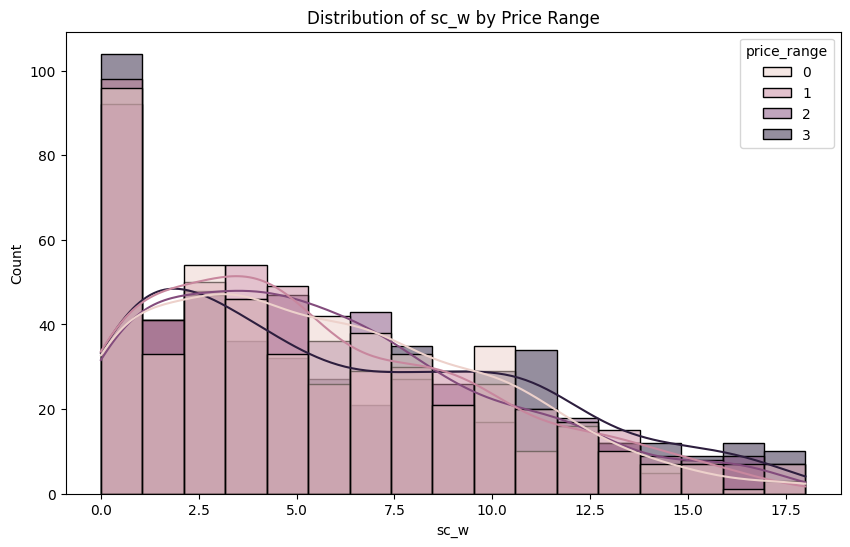

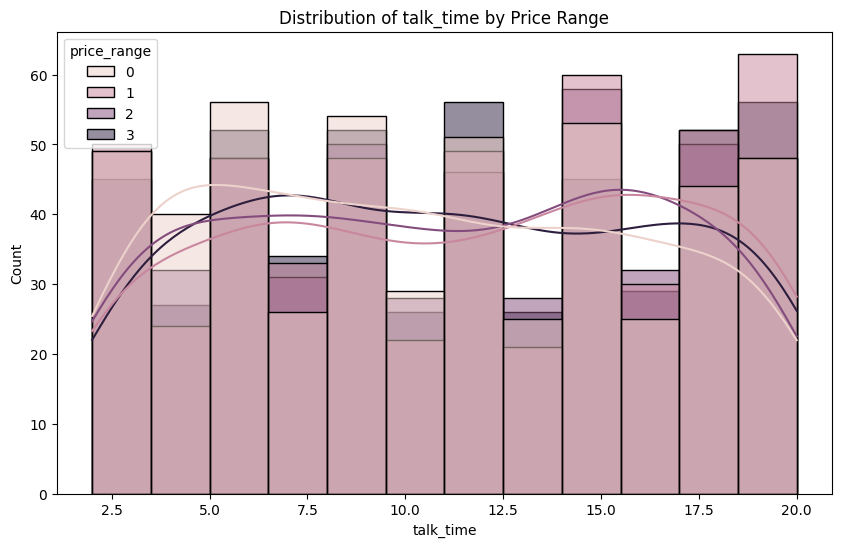

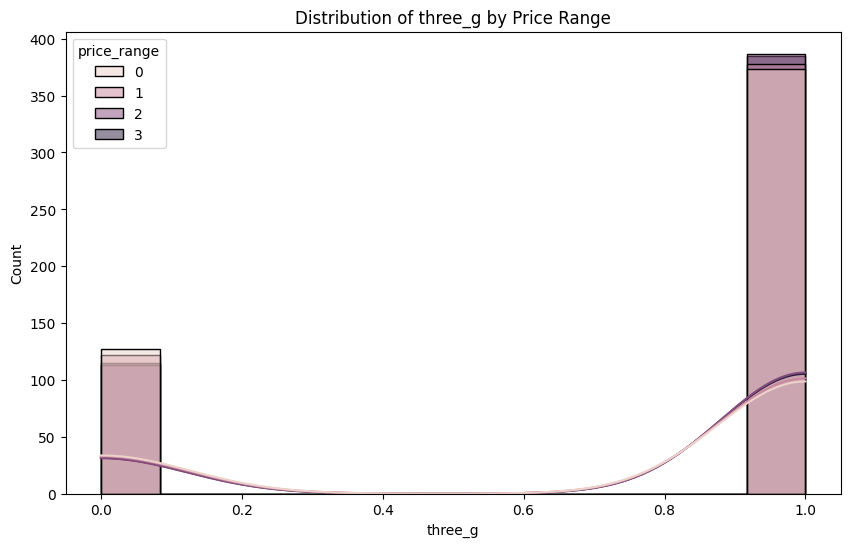

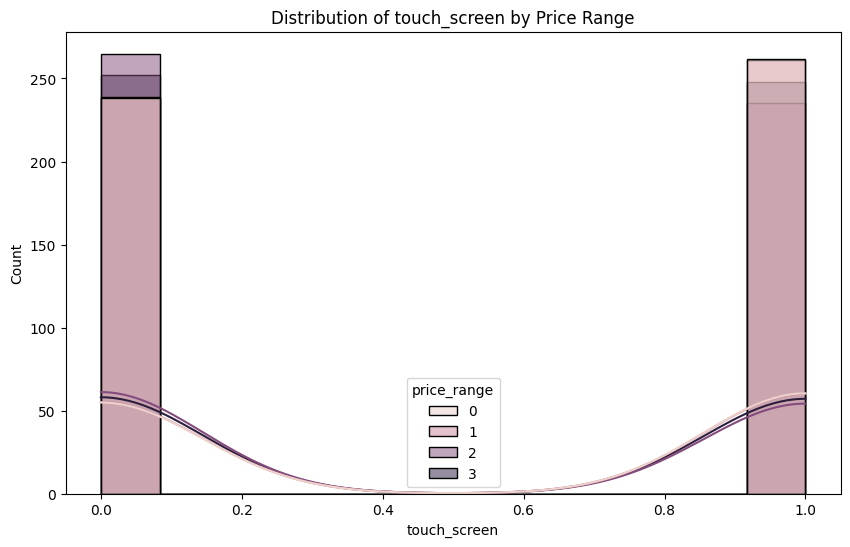

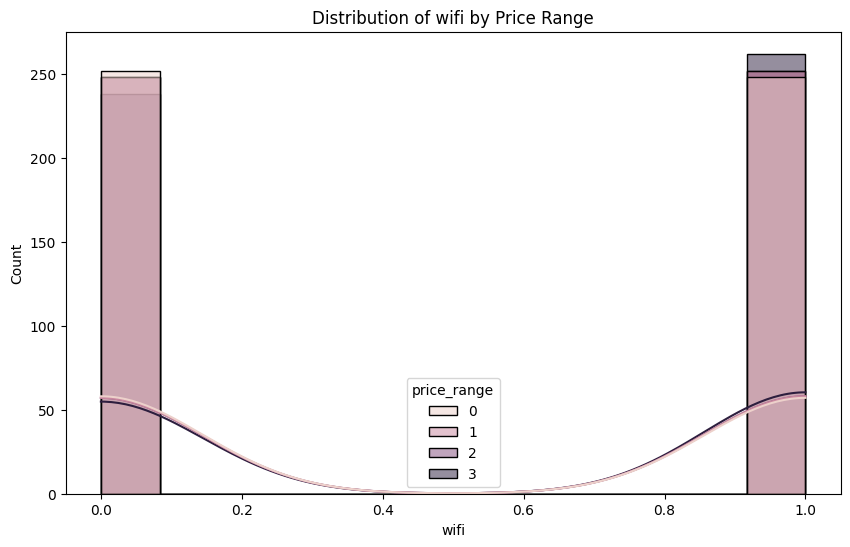

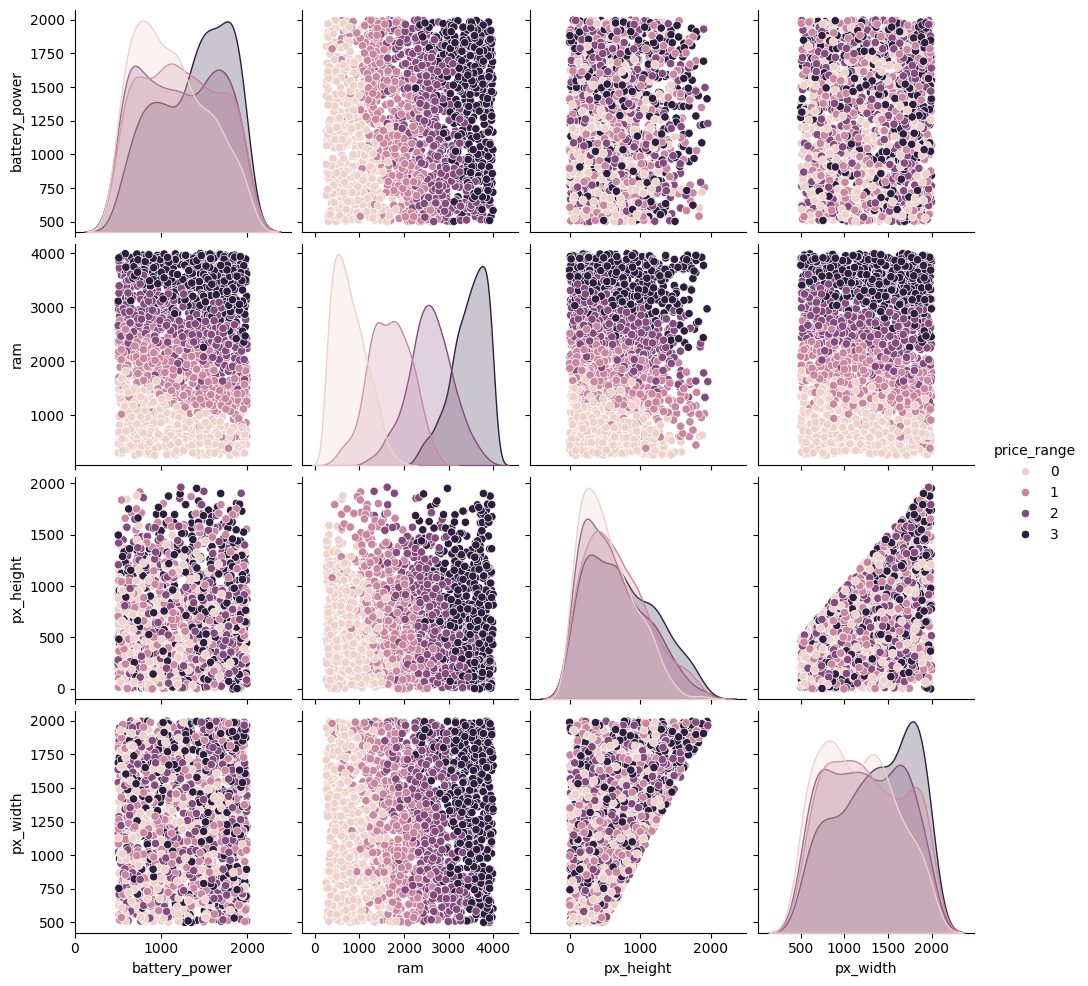

In [132]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
# plt.savefig('EDA_Figures/correlation_heatmap.png')
plt.show()
plt.close()

# Distribution of price ranges
plt.figure(figsize=(8, 6))
sns.countplot(x="price_range", data=train_data)
plt.title('Distribution of Price Ranges')
# plt.savefig("EDA_Figures/price_range_distribution.png")
plt.show()
plt.close()

# Feature distributions
for column in train_data.columns:
    if train_data[column].dtype in ["int64", "float64"] and column != "price_range":
        plt.figure(figsize=(10, 6))
        sns.histplot(data=train_data, x=column, hue="price_range", kde=True)
        plt.title(f'Distribution of {column} by Price Range')
        # plt.savefig(f"EDA_Figures/{column}_distribution.png")
        plt.show()
        plt.close()
# Pairplot to visualize relationships between features
sns.pairplot(
    train_data,
    vars=["battery_power", "ram", "px_height", "px_width"],
    hue="price_range",
)
plt.savefig(f'EDA_Figures/pairplot_of_features.png')
plt.show()

### Insights from the EDA


#### Correlation Matrix:
- Features such as `ram`, `battery_power`, `px_height`, and `px_width` show significant correlation with the target variable (`price_range`). These features are likely to be important predictors for the model.
- There are also some strong correlations among features themselves, such as between `px_height` and `px_width`, which indicates multicollinearity.

#### Feature vs Target Analysis:
- **Battery Power:** Devices with higher battery power tend to belong to higher price ranges. This makes sense as higher-end devices typically have better battery capacities.
- **RAM:** There is a clear trend that devices with more RAM are in higher price ranges. RAM is a significant factor in determining the cost of a device.
- **Pixel Resolution:** Higher pixel resolution (both height and width) is associated with higher price ranges, indicating that higher-end devices have better displays.
- **Internal Memory:** Higher internal memory is generally associated with higher price ranges, as more storage is a premium feature.
- **Clock Speed:** Devices with higher clock speeds are generally in higher price ranges.
- **Front and Primary Cameras:** Higher megapixels in both front and primary cameras are associated with higher price ranges.

## Feature Selection

1. Feature interaction
   - we can create new interaction features like `screen_area`, `pixel_density`, and `camera_megapixels_ratio`:

In [133]:
# Screen Area
train_data["screen_area"] = train_data["sc_h"] * train_data["sc_w"]

# # Pixel Density
# train_data["pixel_density"] = (
#     train_data["px_height"] * train_data["px_width"]
# ) / train_data["screen_area"]

# # Camera Megapixels Ratio
# train_data["camera_mp_ratio"] = train_data["fc"] / train_data["pc"]
# train_data["camera_mp_ratio"] = train_data["camera_mp_ratio"].replace(
#     np.inf, 0
# )  # Handle division by zero

2. Categorical to Numerical Transformation
    - Since the connectivity features are already binary (0 or 1), they are numerically represented, but we may want to ensure no further transformation is needed:



In [134]:
# No need to explicitly convert binary features; they are already numerical (0 or 1).
binary_features = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

3. Log Transformation
    - Apply log transformation to skewed numerical features like RAM, battery power, and internal memory to reduce skewness:



In [135]:
# Log Transformation
train_data["log_ram"] = np.log1p(train_data["ram"])
train_data["log_battery_power"] = np.log1p(train_data["battery_power"])
train_data["log_int_memory"] = np.log1p(train_data["int_memory"])

4. Binning
    - Binning helps categorize continuous variables into discrete bins. Here’s how you can bin features like battery power, RAM, and internal memory:


In [136]:
# Binning using quantiles (quartile-based binning)
train_data["battery_power_bin"] = pd.qcut(
    train_data["battery_power"], q=4, labels=False
)
train_data["ram_bin"] = pd.qcut(train_data["ram"], q=4, labels=False)
train_data["int_memory_bin"] = pd.qcut(train_data["int_memory"], q=4, labels=False)

5. Normalization and Standardization
   - We can use either StandardScaler (for standardization) or MinMaxScaler (for normalization) depending on what suits the model best. Here's an example with StandardScaler:

In [139]:
# Normalize or Standardize features
scaler = StandardScaler()
numerical_features = [
    "battery_power",
    "clock_speed",
    "fc",
    "int_memory",
    "m_dep",
    "mobile_wt",
    "n_cores",
    "pc",
    "px_height",
    "px_width",
    "ram",
    "sc_h",
    "sc_w",
    "talk_time",
]

train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])

# Verify the new features
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,touch_screen,wifi,price_range,screen_area,log_ram,log_battery_power,log_int_memory,battery_power_bin,ram_bin,int_memory_bin
0,-0.902597,0,0.830779,0,-0.764629,0.0,-1.382405,0.339276,1.350676,-1.101463,...,0,1,1,63.0,7.843849,6.736967,2.079442,0,2,0
1,-0.495139,1,-1.253064,1,-0.995615,1.0,1.156334,0.686381,-0.120727,-0.664034,...,1,0,2,51.0,7.875499,6.929517,3.988984,1,2,3
2,-1.537686,1,-1.253064,1,-0.533642,1.0,0.494054,1.380591,0.133939,0.210825,...,1,0,2,22.0,7.864804,6.335054,3.737670,0,2,2
3,-1.419319,1,1.198517,0,-0.995615,0.0,-1.216835,1.033486,-0.262208,0.648255,...,0,0,2,128.0,7.926603,6.423247,2.397895,0,2,0
4,1.325906,1,-0.395011,0,2.007209,1.0,0.659624,0.339276,0.020754,-1.101463,...,1,0,1,16.0,7.252762,7.507690,3.806662,3,1,2


In [138]:
train_data.to_csv("cleaned_train_data.csv", index=False)